In [1]:
import pandas as pd
import XCCourseHelper as XC
import os
import matplotlib.pyplot as plt
import GradeAdjustedPace

In [2]:
directory = "Courses/TWM"
dfs = []
CourseInformationList = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print(filename)
    if filename.endswith(".gpx"):
        FilePath = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(FilePath):
            CourseName = filename[0:-4]
            CourseInformation, df = XC.GetCourseInformation(CourseName, FilePath)
            CourseInformationList.append(CourseInformation)
            dfs.append(df)

CourseInformationDF = pd.concat(CourseInformationList, ignore_index=True)

Coolsaet.gpx


c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_newRow, ignore_index=True)
c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_newRow, ignore_index=True)
c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_newRow, ignore_index=True)
c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be

Setlack.gpx


c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_newRow, ignore_index=True)
c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_newRow, ignore_index=True)
c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_newRow, ignore_index=True)
c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be

In [3]:
course = 'TWM'
gpx_file='./Courses/TWM/Setlack.gpx'
df, turn_st_dev, tot_deg_turned, HairpinCount, perim, area = XC.MakeInitialDataframe(
        course, gpx_file
    )

c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_newRow, ignore_index=True)
c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_newRow, ignore_index=True)
c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_newRow, ignore_index=True)
c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be

In [4]:
df.head()

time        Lat        Lon  Elevation  \
Distance                                                              
0.409274 1970-01-01 00:00:00+00:00  43.651050 -79.386529       90.0   
0.411954 1970-01-01 00:00:01+00:00  43.651073 -79.386539       90.0   
0.414292 1970-01-01 00:00:02+00:00  43.651093 -79.386548       90.0   
0.416524 1970-01-01 00:00:03+00:00  43.651112 -79.386557       90.0   
0.421016 1970-01-01 00:00:04+00:00  43.651150 -79.386576       90.1   

          Elevation SavGol  Elevation SavGol Difference  Elevation Difference  \
Distance                                                                        
0.409274         90.025274                          NaN                   0.0   
0.411954         90.054479                     0.029205                   0.0   
0.414292         90.084262                     0.029782                   0.0   
0.416524         90.114615                     0.030354                   0.0   
0.421016         90.145534                     0.030919                  -0.1   

          Time Difference  DistanceChangeInKM  Angle Difference  
Distance                                                         
0.409274              0.0                 NaN               NaN  
0.411954              1.0            0.002680               NaN  
0.414292              1.0            0.002338               NaN  
0.416524              1.0            0.002232               NaN  
0.421016              1.0            0.004492               NaN

In [5]:
import copy
import numpy as np
from scipy.signal import savgol_filter
pace_hist = ((df["Time Difference"] / 60) / df["DistanceChangeInKM"]).values
df["PaceInMinPerKM"] = pace_hist

df['PaceInMinPerKM'] = df['PaceInMinPerKM'].apply(lambda x: x if x < 4.2 else 4.2)
df["PaceInMinPerKM"] = savgol_filter(df["PaceInMinPerKM"], 101, 3)

3.4972307445738964


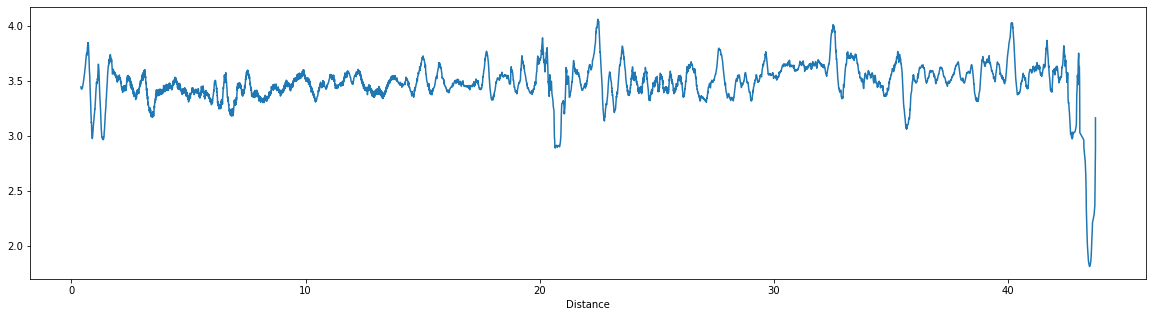

In [6]:
df['PaceInMinPerKM'].plot(figsize=(20,5))
print(df['PaceInMinPerKM'].mean())

In [7]:
CourseInformationDF

Course  Turn Stdev  Total Degrees Turned  Perimeters/Total Distance  \
0  Coolsaet   10.783071          12212.161982               43408.467026   
1   Setlack   22.167832          92383.508678               43725.210760   

   Course Area (m^2)  Number of Hairpin Turns  Hill Stdev  Tallest Hill (m)  \
0       6.000887e+06                        3    9.363194              22.9   
1       5.981733e+06                       60    9.235439              22.9   

   Length of tallest hill (m)  Number of Hills  Total Elevation Gain (m)  \
0                    2.443978                6                     244.2   
1                    2.468731                7                     257.2   

   Total Elevation Gain Unfiltered (m)  Start Lat  Start Lon  \
0                                244.2  43.651081 -79.386515   
1                                257.2  43.651050 -79.386529   

   Course Ave. GAP - Strava  Course Ave. GAP - Minetti  
0                  0.998170                   1.003805  
1                  1.001401                   1.006919

In [8]:
df.head()

time        Lat        Lon  Elevation  \
Distance                                                              
0.409274 1970-01-01 00:00:00+00:00  43.651050 -79.386529       90.0   
0.411954 1970-01-01 00:00:01+00:00  43.651073 -79.386539       90.0   
0.414292 1970-01-01 00:00:02+00:00  43.651093 -79.386548       90.0   
0.416524 1970-01-01 00:00:03+00:00  43.651112 -79.386557       90.0   
0.421016 1970-01-01 00:00:04+00:00  43.651150 -79.386576       90.1   

          Elevation SavGol  Elevation SavGol Difference  Elevation Difference  \
Distance                                                                        
0.409274         90.025274                          NaN                   0.0   
0.411954         90.054479                     0.029205                   0.0   
0.414292         90.084262                     0.029782                   0.0   
0.416524         90.114615                     0.030354                   0.0   
0.421016         90.145534                     0.030919                  -0.1   

          Time Difference  DistanceChangeInKM  Angle Difference  \
Distance                                                          
0.409274              0.0                 NaN               NaN   
0.411954              1.0            0.002680               NaN   
0.414292              1.0            0.002338               NaN   
0.416524              1.0            0.002232               NaN   
0.421016              1.0            0.004492               NaN   

          PaceInMinPerKM  
Distance                  
0.409274        3.444495  
0.411954        3.438968  
0.414292        3.434338  
0.416524        3.430575  
0.421016        3.427654

<AxesSubplot:xlabel='Distance'>

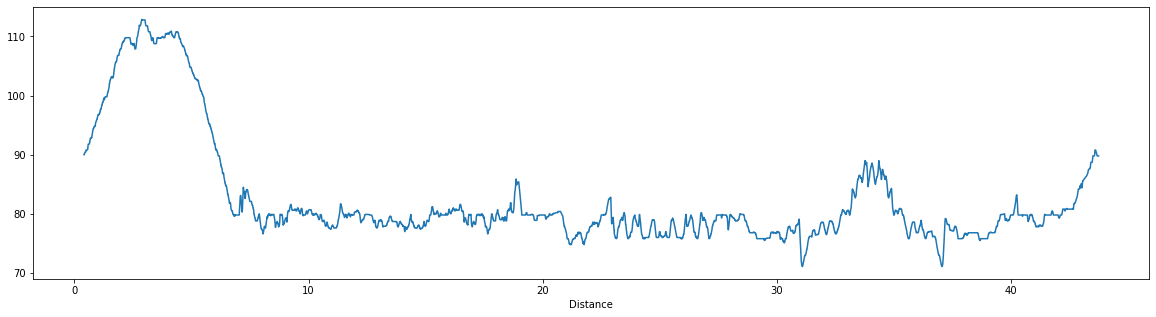

In [9]:
df['Elevation'].plot(figsize=(20,5))

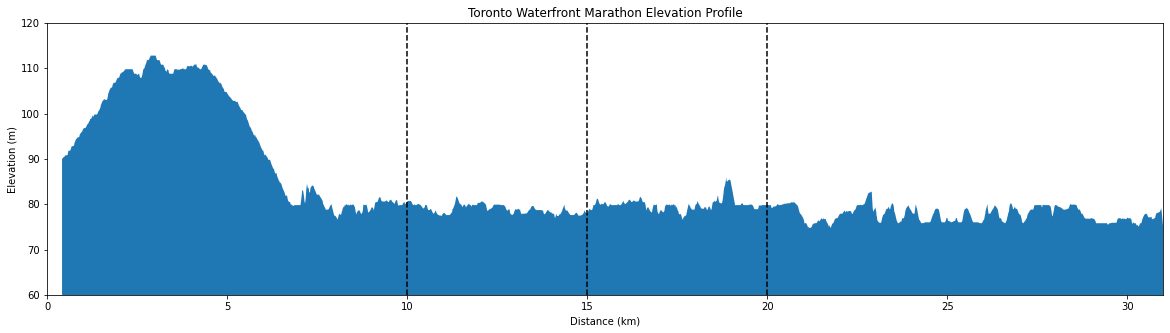

In [10]:
def PlotElevationProfile(df):
    fig = plt.figure(figsize=(20,5))
    plt.fill_between(x=df.index, y1=0, y2=df['Elevation'])
    ymin = 60
    ymax = 120
    plt.ylim(ymin,ymax)
    plt.xlim(0,31)
    plt.xlabel('Distance (km)')
    plt.ylabel('Elevation (m)')
    plt.vlines(x=[10,15,20], ymin=ymin, ymax=ymax, colors='k', linestyles='dashed')
    plt.title('Toronto Waterfront Marathon Elevation Profile')
    plt.show()

PlotElevationProfile(df)


### Adding Gradient

In [11]:
GAP = GradeAdjustedPace.GAP(df)
GAP.getMinettiCourseGAP()
GAP.getStravaCourseGAP()
df = GAP.gradientCalculation()

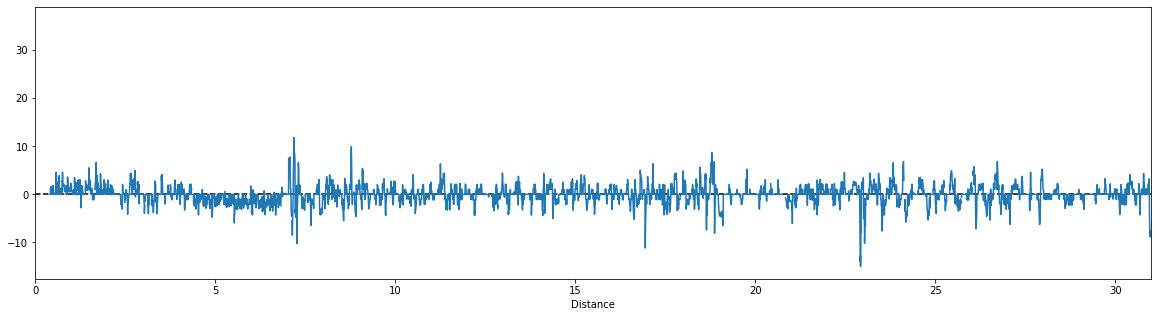

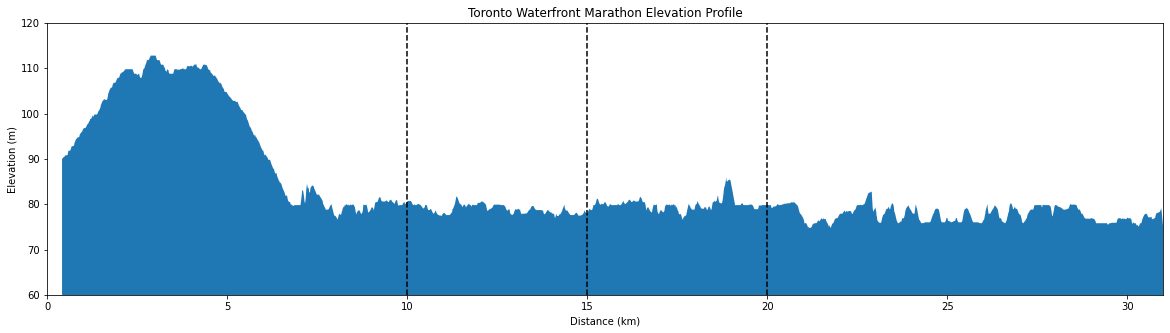

In [12]:
df['Gradient'].plot(figsize=(20,5))
plt.xlim(0,31)
plt.hlines(0,0,31, colors='k', linestyles='dashed')

PlotElevationProfile(df)
# df

In [13]:
df.to_csv('./Course DataFrames/TWM19.csv')
CourseInformationDF.to_csv('./Course DataFrames/TWM19Info.csv')

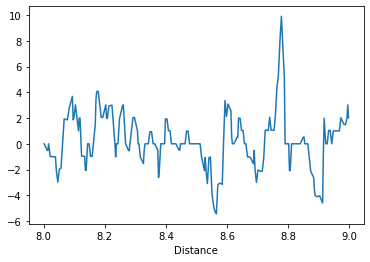

<AxesSubplot:xlabel='Distance'>

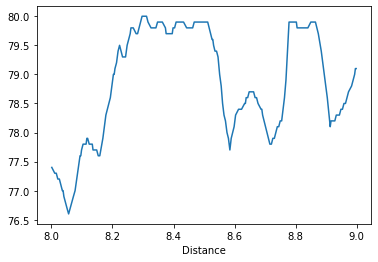

In [14]:
df['Gradient'].loc[(df.index<9) & (df.index>8)].plot()
plt.show()
df['Elevation'].loc[(df.index<9) & (df.index>8)].plot()